### 4장 심파이(SymPy)로 공부하는 미적분

#### 연습문제 4.1.1

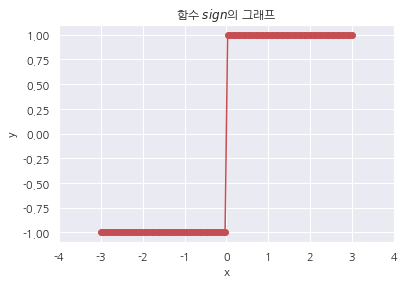

In [14]:
# 부호함수의 그래프
x = np.linspace(-3, 3, 100)
y = np.sign(x)
plt.plot(x, y, 'ro-')
plt.xlim(-4, 4)
plt.title("함수 $sign $의 그래프")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

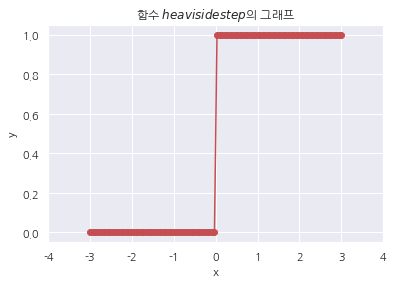

In [15]:
# 단위계단함수
def heaviside_step(x):
    if isinstance(x, np.ndarray):
        return np.where(x >= 0, 1, 0)
    else:
        return 1.0 if x >= 0 else 0.0 

x = np.linspace(-3, 3, 100)
y = heaviside_step(x)
plt.plot(x, y, 'ro-')
plt.xlim(-4, 4)
plt.title("함수 $heaviside step $의 그래프")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [11]:
import matplotlib.font_manager

matplotlib.font_manager._rebuild()
sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist if f.name.startswith("Nanum")])

['NanumBarunGothic',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumGothic']

In [13]:
# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

###  SymPy

In [4]:
import sympy
# Juypter 노트북에서 수학식의 LaTeX 표현을 위해 필요함
sympy.init_printing(use_latex='mathjax')

In [5]:
x = sympy.symbols('x')
x

x

In [6]:
type(x)

sympy.core.symbol.Symbol

In [7]:
f = x * sympy.exp(x)
f

   x
x⋅ℯ 

In [9]:
sympy.diff(f)

   x    x
x⋅ℯ  + ℯ 

In [11]:
x, y = sympy.symbols('x y')
f = x ** 2 + 4 * x * y + y **2
f

 2            2
x  + 4⋅x⋅y + y 

In [12]:
sympy.diff(f, x)

2⋅x + 4⋅y

In [13]:
sympy.diff(f, y)

4⋅x + 2⋅y

In [15]:
x, mu, sigma = sympy.symbols('x mu sigma')
f = sympy.exp((x - mu) ** 2 / sigma ** 2)
f

         2
 (-μ + x) 
 ─────────
      2   
     σ    
ℯ         

In [16]:
sympy.diff(f, x)

                      2
              (-μ + x) 
              ─────────
                   2   
                  σ    
(-2⋅μ + 2⋅x)⋅ℯ         
───────────────────────
            2          
           σ           

In [17]:
sympy.simplify(sympy.diff(f, x))

                   2
            (μ - x) 
            ────────
                2   
               σ    
2⋅(-μ + x)⋅ℯ        
────────────────────
          2         
         σ          

In [18]:
# 2차 도함수
sympy.diff(f, x, x)

                           2
                    (μ - x) 
                    ────────
  ⎛             2⎞      2   
  ⎜    2⋅(μ - x) ⎟     σ    
2⋅⎜1 + ──────────⎟⋅ℯ        
  ⎜         2    ⎟          
  ⎝        σ     ⎠          
────────────────────────────
              2             
             σ              

In [22]:
# 연습문제 4.2.5
x = sympy.symbols('x')
f1 = x ** 3 - 1
sympy.diff(f1)

   2
3⋅x 

In [23]:
x, k = sympy.symbols('x k')
f2 = sympy.log(x ** 2 - 3 * k)
sympy.diff(f2, x)

   2⋅x   
─────────
        2
-3⋅k + x 

In [24]:
x, a, b = sympy.symbols('x a b')
f3 = sympy.exp(a * x ** b)
sympy.diff(f3, x)

           b
     b  a⋅x 
a⋅b⋅x ⋅ℯ    
────────────
     x      

In [27]:
# 연습문제 4.3.4
x, y = sympy.symbols('x y')
f = (1 + x * y)
sympy.integrate(f, x)

 2      
x ⋅y    
──── + x
 2      

In [28]:
f = x * y * sympy.exp(x ** 2 + y ** 2)
sympy.integrate(f, x)

    2    2
   x  + y 
y⋅ℯ       
──────────
    2     

In [30]:
# 정적분
x, y = sympy.symbols('x y')
f = x ** 3 - 3 * x ** 2 + x + 6
F = sympy.integrate(f)
(F.subs(x, 2) - F.subs(x, 0)).evalf()

10.0000000000000

In [33]:
# 수치적분
import scipy as sp
def f(x):
    return x ** 3 - 3 * x ** 2 + x + 6


sp.integrate.quad(f, 0, 2)  # 정적분 (수치적분)

(10.0, 1.1102230246251565e-13)

In [32]:
# 연습문제 4.3.5
